In [17]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from natsort import natsorted
import matplotlib.pyplot as plt

wd = '/home/max_vdl/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx'

rna_expression_df_main = pd.read_csv(f'{wd}/data/proteomicsDB/mainProts.csv')
rna_expression_df_main = rna_expression_df_main.pivot(index='Tissue Name', columns='Gene Name', values='Avarage Normalized Intensity')
rna_expression_df_main.index = rna_expression_df_main.index.str.capitalize()
order = ['Tonsil', 'Vermiform appendix', 'Bone marrow', 'Spleen', 'Lymph node',
       'Brain', 'Cerebellum', 'Cerebral cortex', 'Prefrontal cortex', 'Temporal lobe',
       'Adipose tissue', 'Skeletal muscle', 'Smooth muscle', 
       'Thyroid gland', 'Adrenal gland', 'Prostate gland', 'Pancreas',
       'Mammary gland', 'Uterine cervix', 'Ovary', 'Uterine endometrium', 'Breast', 
       'Colon', 'Duodenum', 'Esophagus', 'Gall bladder', 'Rectum', 'Salivary gland', 'Small intestine', 'Stomach', 'Tube',
       'Epididymis', 'Seminal vesicle', 'Testis',
       'Kidney', 'Urinary bladder',
       'Lung',
       'Heart', 'Skin']
selected_tissues = ['Tonsil', 'Vermiform appendix', 'Bone marrow', 'Spleen', 'Lymph node',
       'Brain', 'Cerebellum', 'Cerebral cortex', 'Prefrontal cortex', 'Temporal lobe',
       'Thyroid gland', 'Adrenal gland', 'Prostate gland', 'Pancreas']
rna_expression_df_main.reindex(order)
rna_expression_df_main

Gene Name,ICMT,PLEK,RCE1,SPTLC1,SPTLC2,SPTSSA,ZDHHC17
Tissue Name,,,,,,,
Adipose tissue,1.46,1.15,0.95,1.61,1.54,1.30,1.12
Adrenal gland,1.45,0.56,0.94,1.54,1.25,1.15,1.46
Bone marrow,0.40,2.57,1.10,1.33,1.33,0.54,1.13
Brain,1.15,0.20,0.73,1.44,1.26,1.13,1.56
Breast,1.19,0.99,0.90,1.77,1.35,1.66,1.25
Cerebellum,1.32,-0.60,1.51,1.41,0.83,0.89,1.84
Cerebral cortex,1.25,0.94,0.86,1.80,1.39,1.40,1.66
Colon,1.38,0.50,0.83,1.57,1.20,1.50,0.95
Corpus callosum,0.71,0.35,0.46,1.47,1.92,0.69,2.06


In [18]:
rna_expression_df_zinc = pd.read_csv(f'{wd}/data/proteomicsDB/zincProts.csv')
rna_expression_df_zinc = rna_expression_df_zinc.pivot(index='Tissue Name', columns='Gene Name', values='Avarage Normalized Intensity')
rna_expression_df_zinc.index = rna_expression_df_zinc.index.str.capitalize()
rna_expression_df_zinc.reindex(order)
colorder = natsorted(list(rna_expression_df_zinc.columns))
rna_expression_df_zinc = rna_expression_df_zinc.reindex(colorder, axis=1)
rna_expression_df_zinc


Gene Name,ZDHHC1,ZDHHC2,ZDHHC3,ZDHHC4,ZDHHC5,ZDHHC6,ZDHHC7,ZDHHC8,ZDHHC9,ZDHHC11,...,ZDHHC15,ZDHHC16,ZDHHC17,ZDHHC18,ZDHHC19,ZDHHC20,ZDHHC21,ZDHHC22,ZDHHC23,ZDHHC24
Tissue Name,,,,,,,,,,,,,,,,,,,,,
Adipose tissue,0.90,1.00,1.43,1.50,1.50,1.22,1.51,1.25,1.50,-0.16,...,-0.22,0.96,1.12,1.32,0.63,1.22,0.41,NaN,-0.25,0.66
Adrenal gland,0.56,1.27,1.28,1.38,1.23,1.14,1.19,0.88,0.75,-0.05,...,0.14,1.13,1.46,0.66,0.15,1.43,0.86,-1.15,0.11,0.42
Bone marrow,-0.70,1.30,1.44,1.12,1.25,1.14,1.61,0.84,0.53,-0.40,...,-1.00,0.63,1.13,1.88,-1.00,1.30,0.20,NaN,-0.40,0.51
Brain,0.58,1.10,1.31,1.52,1.09,1.14,1.17,1.24,1.64,1.17,...,0.07,1.03,1.56,1.06,-0.28,1.57,0.74,1.37,0.62,0.72
Breast,0.89,0.95,1.33,1.53,1.48,1.45,1.37,0.95,1.35,0.34,...,0.28,1.31,1.25,1.03,NaN,1.17,0.89,NaN,0.30,0.52
Cerebellum,0.77,1.34,1.54,1.02,1.34,0.78,1.30,1.77,0.97,1.86,...,-0.07,1.26,1.84,1.39,-0.28,0.97,0.78,1.13,0.23,0.72
Cerebral cortex,0.79,1.32,1.25,1.55,1.36,1.39,1.41,1.45,1.85,0.46,...,0.68,1.24,1.66,1.26,-1.00,1.42,1.20,1.81,0.79,0.83
Colon,0.61,1.09,1.40,1.44,1.35,1.34,1.43,0.96,1.25,-0.02,...,-0.12,1.07,0.95,1.01,-1.80,1.34,0.45,-0.67,0.32,0.36
Corpus callosum,-0.28,1.35,1.03,1.06,0.63,1.01,1.12,0.27,1.81,1.02,...,0.51,1.02,2.06,0.25,-1.12,2.09,1.19,0.02,0.41,0.01


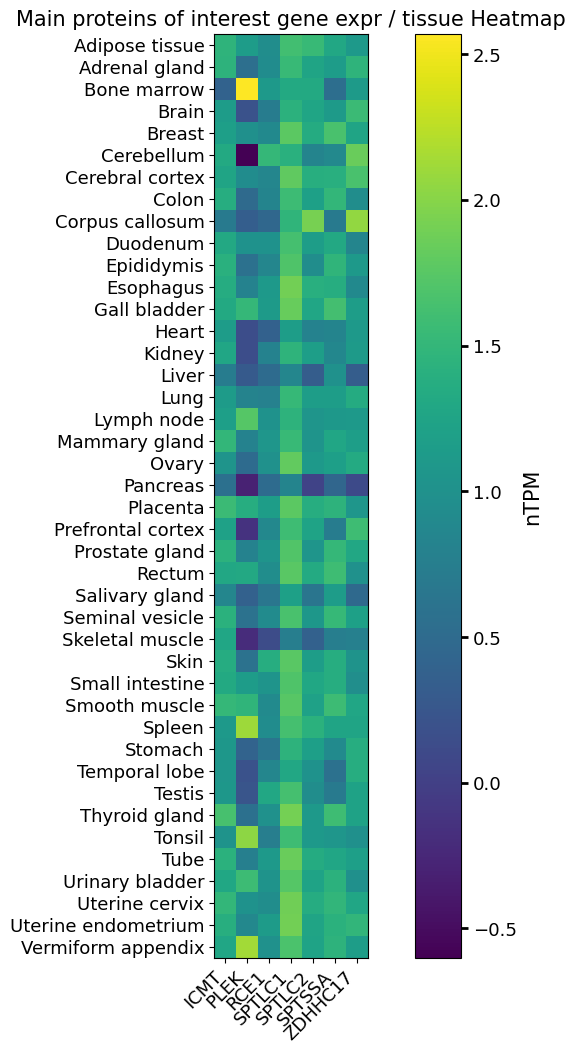

In [19]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
df = rna_expression_df_main
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mainProts.pdf', bbox_inches='tight')


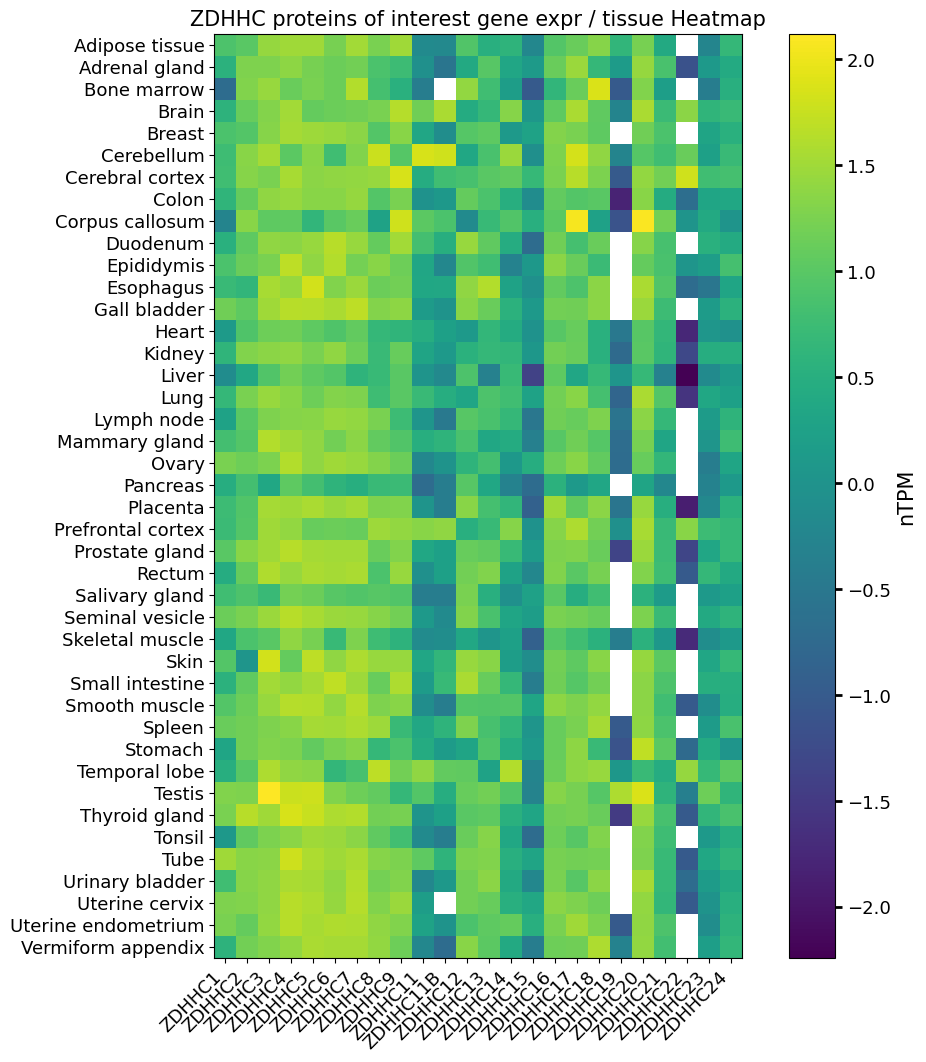

In [20]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
df = rna_expression_df_zinc
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('ZDHHC proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/zincProts.pdf', bbox_inches='tight')


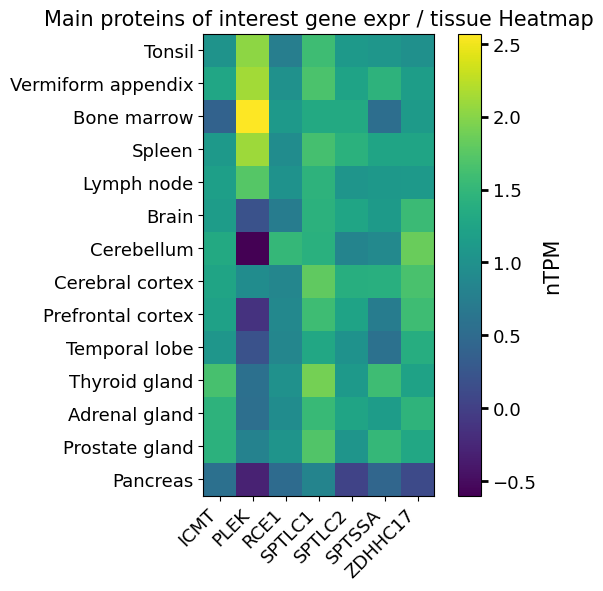

In [29]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
df = rna_expression_df_main.loc[selected_tissues]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mainProts_selectedTissues.pdf', bbox_inches='tight')


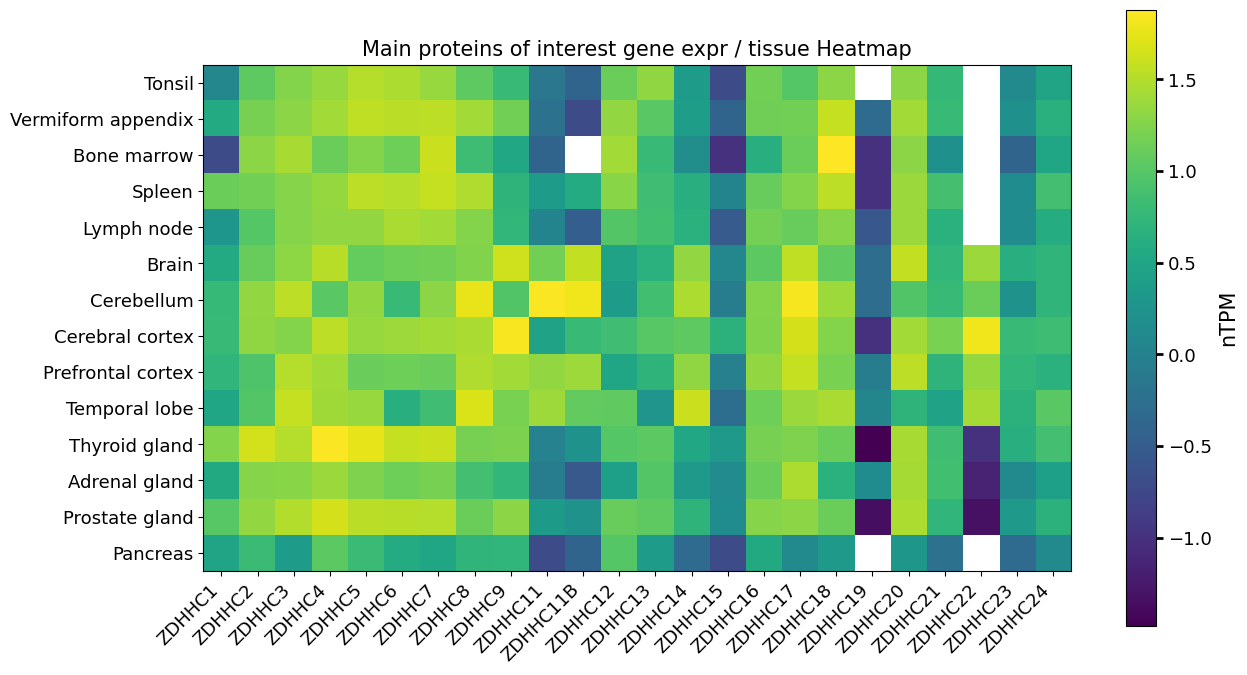

In [34]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(14, 8))
df = rna_expression_df_zinc.loc[selected_tissues]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/zincProts_selectedTissues.pdf', bbox_inches='tight')
